## Description: This program optimizes the stock portfolio

In [3]:
#import the libraries
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read Data
df = data.DataReader(['TSLA', 'FB'], 'yahoo', start='2018/01/01', end='2019/12/31')

In [5]:
df.head()

Attributes  Adj Close                  Close                   High  \
Symbols          TSLA          FB       TSLA          FB       TSLA   
Date                                                                  
2018-01-02  64.106003  181.419998  64.106003  181.419998  64.421997   
2018-01-03  63.450001  184.669998  63.450001  184.669998  65.050003   
2018-01-04  62.924000  184.330002  62.924000  184.330002  63.709999   
2018-01-05  63.316002  186.850006  63.316002  186.850006  63.448002   
2018-01-08  67.281998  188.279999  67.281998  188.279999  67.403999   

Attributes                    Low                   Open              \
Symbols             FB       TSLA          FB       TSLA          FB   
Date                                                                   
2018-01-02  181.580002  62.200001  177.550003  62.400002  177.679993   
2018-01-03  184.779999  63.110001  181.330002  64.199997  181.880005   
2018-01-04  186.210007  61.136002  184.100006  62.574001  184.899994   
2018-01-05  186.899994  62.400002  184.929993  63.324001  185.589996   
2018-01-08  188.899994  63.099998  186.330002  63.200001  187.199997   

Attributes    Volume            
Symbols         TSLA        FB  
Date                            
2018-01-02  21761000  18151900  
2018-01-03  22607500  16886600  
2018-01-04  49731500  13880900  
2018-01-05  22956000  13574500  
2018-01-08  49297000  17994700

In [6]:
# Closing price
df_adj_close = df['Adj Close']

In [9]:
df_adj_close.head()

Symbols,TSLA,FB
Date,,
2018-01-02,64.106003,181.419998
2018-01-03,63.450001,184.669998
2018-01-04,62.924000,184.330002
2018-01-05,63.316002,186.850006
2018-01-08,67.281998,188.279999


## $S^{2} = \frac{\sum\limits_{i = 1}^{N} \left(x_{i} - \bar{x}\right)^{2}}{N - 1} \\ S^{2}	=	\text{sample variance} \\ x_{i} = \text{the value of the one observation} \\ \bar{x} = \text{the mean value of all observations} \\ N = \text{the number of observations}$

In [10]:
# Log of percentage change
tesla = df_adj_close['TSLA'].pct_change().apply(lambda x: np.log(1+x))

In [11]:
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

In [12]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011483734269334606

In [13]:
# Log of Percentage change for Facebook
fb = df_adj_close['FB'].pct_change().apply(lambda x: np.log(1+x))

In [14]:
fb.head()

Date
2018-01-02         NaN
2018-01-03    0.017756
2018-01-04   -0.001843
2018-01-05    0.013579
2018-01-08    0.007624
Name: FB, dtype: float64

In [15]:
# Variance
var_fb = fb.var()
var_fb

0.0004569725841702254

## $\sigma_T = \sqrt{\frac{\sum\limits_{i = 1}^{N} \left(x_{i} - \bar{x}\right)^{2}}{N - 1} \cdot T} = \sqrt{S^{2} \cdot T} = \sigma \sqrt{T} \\ \sigma_T = \text{volatility over a time horizon} \\ \sigma = \text{standard deviation of returns} \\ T = \text{number of periods in a time horizon} \\ x_{i} = \text{the value of the one observation} \\ \bar{x} = \text{the mean value of all observations} \\ N = \text{the number of observations}$

In [16]:
# Volatility
#250 is used because there are 250 trading days in a year.
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)

In [17]:
tesla_vol, fb_vol

(0.5358109337568292, 0.33799873674698305)

<AxesSubplot:xlabel='Symbols'>

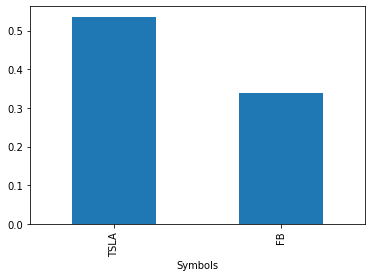

In [18]:
# Volatility of both stocks
df_adj_close.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

## $cov_{x,y} = \frac{\sum\limits_{i=1}^{N} \left(x_{i} - \bar{x}\right) \left(y_{i} - \bar{y}\right)}{N - 1} \\ cov_{x,y} = \text{covariance between variable x and y} \\ x_{i} = \text{data value of x} \\ y_{i} = \text{data value of y} \\ \bar{x} = \text{mean of x} \\ \bar{y} = \text{mean of y} \\ N = \text{number of data values}$

In [19]:
# Log of Percentage change
df_adj_close1 = df_adj_close.pct_change().apply(lambda x: np.log(1+x))

In [20]:
df_adj_close1.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [21]:
# Covariance
df_adj_close1['TSLA'].cov(df_adj_close1['FB'])

0.0001826162315603097

## $r = \frac{\sum\limits_{i=1}^{N} \left(x_{i} - \bar{x}\right) \left(y_{i} - \bar{y}\right)}{\sqrt{\sum\limits_{i=1}^{N} \left(x_{i} - \bar{x}\right) \sum\limits_{i=1}^{N} \left(y_{i} - \bar{y}\right)}} \\ r = \text{correlation coefficient} \\ x_{i} = \text{values of the x-variable in a sample} \\ \bar{x} = \text{mean of the values of the x-variable} \\ y_{i} = \text{values of the y-variable in a sample} \\ \bar{y} = \text{mean of the values of the y-variable} \\ N = \text{number of data values}$

In [22]:
#Correlation
df_adj_close1['TSLA'].corr(df_adj_close1['FB'])

0.252088327246613

## $E[R] = \sum\limits_{i=1}^{N} R_{i}P_{i} \\ E[R] = \text{expected return} \\ R_i = \text{return in scenario i} \\ P_i = \text{probability for the return} \ R_{i} \ \text{in scenario i} \\ N = \text{number of scenarios}$

In [23]:
#Expected Returns
df_adj_close2 = df_adj_close.pct_change().apply(lambda x: np.log(1+x))

In [24]:
df_adj_close2.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [25]:
# Define weights/probabilities for allocation
w = [0.2, 0.8]
e_r_ind = df_adj_close2.mean()
e_r_ind

Symbols
TSLA    0.000530
FB      0.000246
dtype: float64

In [26]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.00030276915241011175

## Building an optimal risky portfolio

In [27]:
# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')

In [28]:
df.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        NKE       GOOGL        AMZN       AAPL   
Date                                                                  
2014-12-31  25.057606  44.779621  530.659973  310.350006  27.594999   
2015-01-02  24.819241  44.257999  529.549988  308.519989  27.332500   
2015-01-05  24.120045  43.545448  519.460022  302.190002  26.562500   
2015-01-06  24.122320  43.289291  506.640015  295.290009  26.565001   
2015-01-07  24.460564  44.183491  505.149994  298.420013  26.937500   

Attributes                                          High             ...  \
Symbols           NKE       GOOGL        AMZN       AAPL        NKE  ...   
Date                                                                 ...   
2014-12-31  48.075001  530.659973  310.350006  28.282499  48.805000  ...   
2015-01-02  47.514999  529.549988  308.519989  27.860001  48.474998  ...   
2015-01-05  46.750000  519.460022  302.190002  27.162500  47.275002  ...   
2015-01-06  46.474998  506.640015  295.290009  26.857500  47.075001  ...   
2015-01-07  47.435001  505.149994  298.420013  27.049999  47.650002  ...   

Attributes         Low                   Open                         \
Symbols          GOOGL        AMZN       AAPL        NKE       GOOGL   
Date                                                                   
2014-12-31  530.200012  310.010010  28.205000  48.485001  537.739990   
2015-01-02  527.880005  306.959991  27.847500  48.275002  532.599976   
2015-01-05  517.750000  300.850006  27.072500  47.255001  527.150024   
2015-01-06  505.549988  292.380005  26.635000  46.945000  520.500000   
2015-01-07  503.649994  295.329987  26.799999  46.805000  510.950012   

Attributes                   Volume                                   
Symbols           AMZN         AAPL        NKE      GOOGL       AMZN  
Date                                                                  
2014-12-31  311.549988  165613600.0  4697400.0  1232400.0  2048000.0  
2015-01-02  312.579987  212818400.0  4985800.0  1324000.0  2783200.0  
2015-01-05  307.010010  257142000.0  6889200.0  2059100.0  2774200.0  
2015-01-06  302.239990  263188400.0  7576000.0  2722800.0  3519000.0  
2015-01-07  297.500000  160423600.0  7256000.0  2345900.0  2640300.0  

[5 rows x 24 columns]

In [29]:
# Closing price
df = df['Adj Close']

In [30]:
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2014-12-31,25.057606,44.779621,530.659973,310.350006
2015-01-02,24.819241,44.257999,529.549988,308.519989
2015-01-05,24.120045,43.545448,519.460022,302.190002
2015-01-06,24.122320,43.289291,506.640015,295.290009
2015-01-07,24.460564,44.183491,505.149994,298.420013


### Covariance and Correlation matrix

## $cov_{x,y} = \frac{\sum\limits_{i=1}^{N} \left(x_{i} - \bar{x}\right) \left(y_{i} - \bar{y}\right)}{N - 1}, \ r = \frac{\sum\limits_{i=1}^{N} \left(x_{i} - \bar{x}\right) \left(y_{i} - \bar{y}\right)}{\sqrt{\sum\limits_{i=1}^{N} \left(x_{i} - \bar{x}\right) \sum\limits_{i=1}^{N} \left(y_{i} - \bar{y}\right)}} \\ cov_{x,y} = \text{covariance between variable x and y} \\ r = \text{correlation coefficient} \\ x_{i} = \text{values of the x-variable in a sample} \\ \bar{x} = \text{mean of the values of the x-variable} \\ y_{i} = \text{values of the y-variable in a sample} \\ \bar{y} = \text{mean of the values of the y-variable} \\ N = \text{number of data values}$

In [31]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000245,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


In [32]:
# Log of percentage change
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.361188,0.524819,0.496704
NKE,0.361188,1.000000,0.387448,0.341680
GOOGL,0.524819,0.387448,1.000000,0.647952
AMZN,0.496704,0.341680,0.647952,1.000000


## $\sigma_{p}^{2} = \sum\limits_{i=1}^{N}\sum\limits_{j=1}^{N} w_i w_j \ cov_{i,j}$

In [33]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016069830943165779

## Portfolio expected returns

## $E[R] = \sum\limits_{i=1}^{N} R_{i}P_{i} \\ E[R] = \text{expected return} \\ R_i = \text{return in scenario i} \\ P_i = \text{probability for the return} \ R_{i} \ \text{in scenario i} \\ N = \text{number of scenarios}$

In [34]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.282997
NKE      0.192698
GOOGL    0.217545
AMZN     0.472289
dtype: float64

In [35]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2] #here assigned manually below we take randomly
port_er = (w*ind_er).sum()
port_er

0.27006939582202577

In [36]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.247734
NKE      0.233803
GOOGL    0.235191
AMZN     0.288559
dtype: float64

In [37]:
# Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.282997,0.247734
NKE,0.192698,0.233803
GOOGL,0.217545,0.235191
AMZN,0.472289,0.288559


In [38]:
#different weights instead of constant weights
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

In [39]:
num_assets = len(df.columns)
num_portfolios = 10000

In [40]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) #random weights
    weights = weights/np.sum(weights) #normalize weights
    p_weights.append(weights) #assest weights
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights 
    p_ret.append(returns) #portfolio returns
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual(250 days) standard deviation = volatility
    p_vol.append(ann_sd) #portfolio volatility

In [41]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [42]:
for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

0 AAPL
1 NKE
2 GOOGL
3 AMZN


In [43]:
portfolios  = pd.DataFrame(data)

In [44]:
# Dataframe of the 10000 portfolios created
portfolios.head() 

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.260746,0.190909,0.392377,0.259975,0.253519,0.094129
1,0.241660,0.190126,0.198737,0.285340,0.444489,0.071433
2,0.308739,0.209014,0.353446,0.043518,0.331620,0.271416
3,0.228651,0.190050,0.107798,0.383608,0.455275,0.053318
4,0.269821,0.191328,0.399592,0.286807,0.183085,0.130515


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

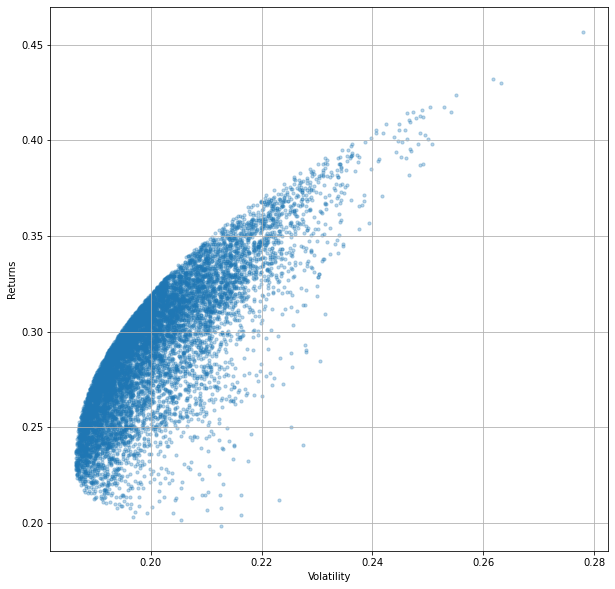

In [45]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [46]:
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Returns         0.229667
Volatility      0.186505
AAPL weight     0.261742
NKE weight      0.408492
GOOGL weight    0.309587
AMZN weight     0.020180
Name: 874, dtype: float64

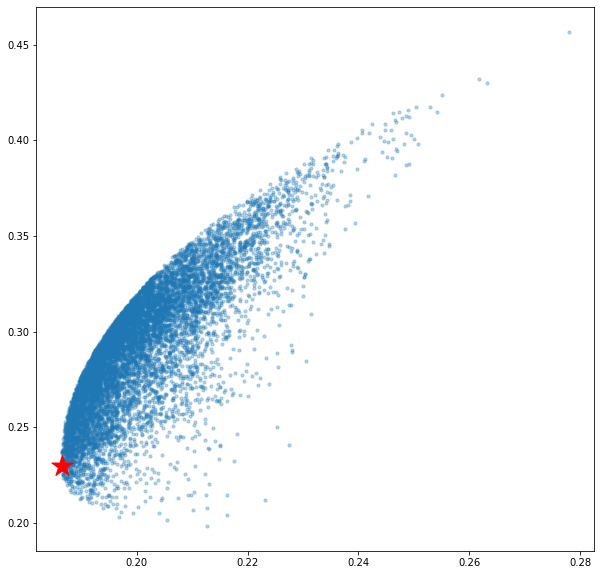

In [47]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

## $\text{Sharpe ratio} = \frac{R_{p} - R_{f}}{\sigma_{p}} \\ \text{where:} \\ R_{p} = \text{return of portfolio} \\ R_{f} = \text{risk-free rate} \\ \sigma_{p} = \text{standard deviation of the portfolio}$

In [48]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.390502
Volatility      0.231387
AAPL weight     0.245717
NKE weight      0.115108
GOOGL weight    0.012135
AMZN weight     0.627040
Name: 4762, dtype: float64

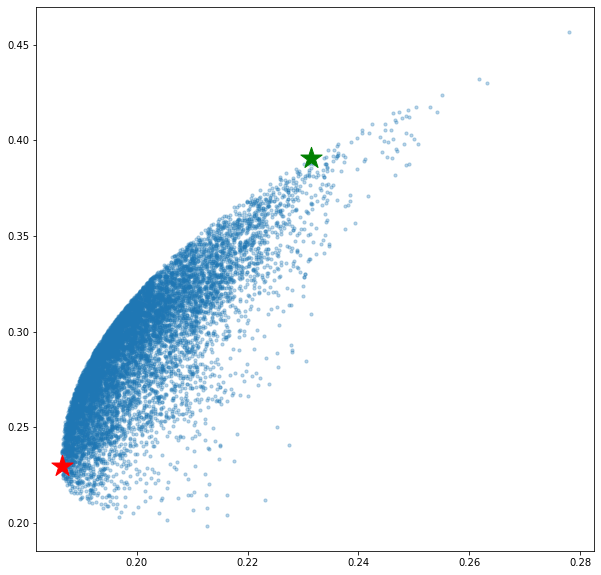

In [49]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)